In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [3]:
data = pd.read_csv('../../../Data/Combo_3_DropNAs.csv')
data.shape

(11091453, 4)

In [4]:
data.head(5)

,Risk_Score,DI,Employment Length,Accepted
0,0.411783,-0.008441,2.668416,1
1,0.871415,-0.007807,2.668416,1
2,0.641599,-0.008137,2.668416,1
3,1.675772,-0.007744,2.668416,1
4,0.641599,-0.007225,0.458258,1


In [5]:
data.Accepted.value_counts()*0.3

0    2693342.7
1     634093.2
Name: Accepted, dtype: float64

In [6]:
X = data.drop('Accepted', axis=1)
X.shape

(11091453, 3)

In [7]:
y = data['Accepted']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [9]:
clf.fit(X_train, y_train)

LogisticRegression()

In [10]:
clf.score(X_test, y_test)

0.8858818020842475

In [11]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [12]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2572742,  120601],
       [ 259120,  374973]])

In [13]:
confusion_matrix_full = pd.DataFrame(cm,
                                     index=["Actual_Rejected","Actual_Accepted"],
                                     columns=["Predicted_Rejected","Predicted_Accepted"])

confusion_matrix_full

,Predicted_Rejected,Predicted_Accepted
Actual_Rejected,2572742,120601
Actual_Accepted,259120,374973


In [14]:
X.columns

Index(['Risk_Score', 'DI', 'Employment Length'], dtype='object')

In [15]:
w0 = clf.intercept_[0]
w0

-3.4204128681171366

In [16]:
clf.coef_[0]

array([   1.5128216 , -143.86471817,    1.34144149])

In [17]:
w = w1, w2, w3 = clf.coef_[0]

In [18]:
w1

1.5128216025154277

In [19]:
w

array([   1.5128216 , -143.86471817,    1.34144149])

In [20]:
import math
import matplotlib.pyplot as plt

feature_importance = pd.DataFrame(X.columns, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)

#from sklearn.linear_model import LogisticRegression
#ax = feature_importance.plot.barh(x='feature', y='importance')
#plt.show()

In [21]:
feature_importance

,feature,importance
0,Risk_Score,4.539521e+00
2,Employment Length,3.824553e+00
1,DI,3.313956e-63


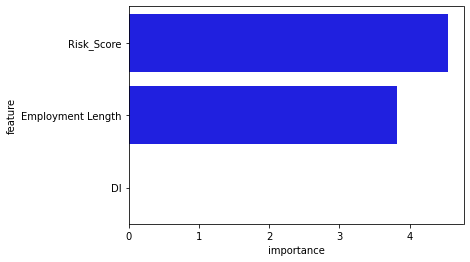

In [22]:
import seaborn as sns
sns.barplot(data=feature_importance, y='feature', x='importance', color='blue');

In [ ]:
## Something is wrong with DI. Look at original data again....! 

## Actually, nothing wrong. Same results even with 3 data case as above. 
## DI doesn't play major role as can be seen in EDA. 